### load **libraries**

In [70]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

### **load Data**

In [71]:
df = pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### **Data exploration**

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [74]:
df.shape

(150, 5)

In [75]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,Iris-virginica


In [76]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [79]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


<Axes: >

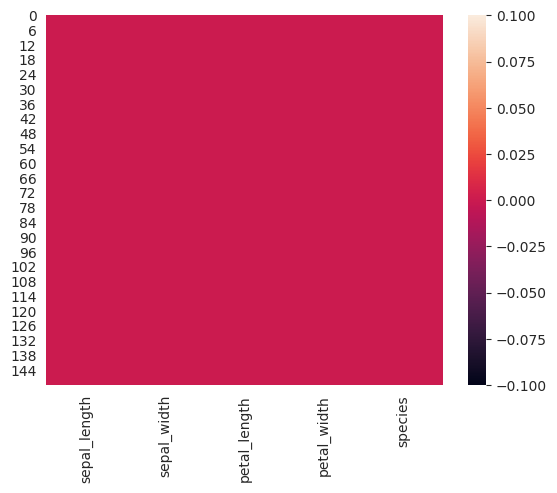

In [85]:
sns.heatmap(df.isnull())

In [88]:
df.drop_duplicates(inplace=True)

### **data analysis**

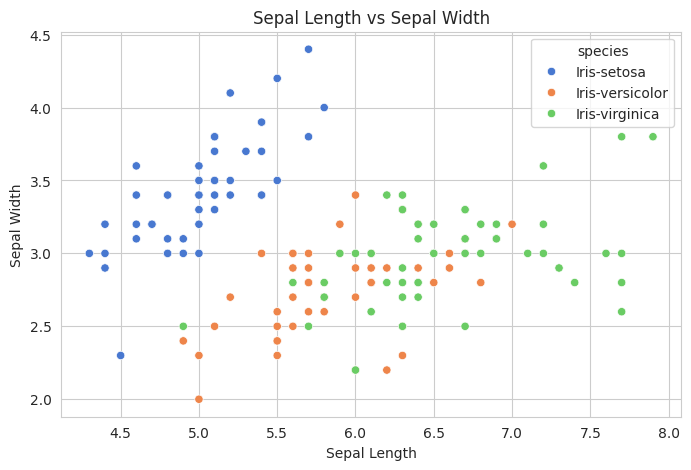

In [89]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["sepal_length"], y=df["sepal_width"], hue=df["species"], palette="muted")
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

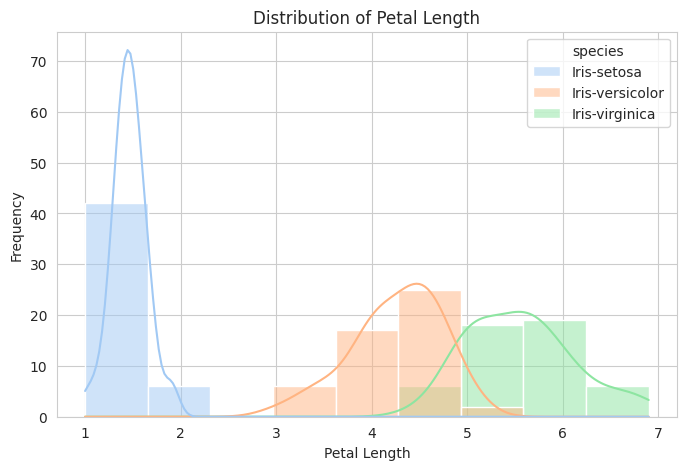

In [90]:
plt.figure(figsize=(8, 5))
sns.histplot(x=df["petal_length"], hue=df["species"], kde=True, palette="pastel")
plt.title("Distribution of Petal Length")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.show()

<ipython-input-91-38bddf39df14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["species"], y=df["petal_width"], palette="Set2")


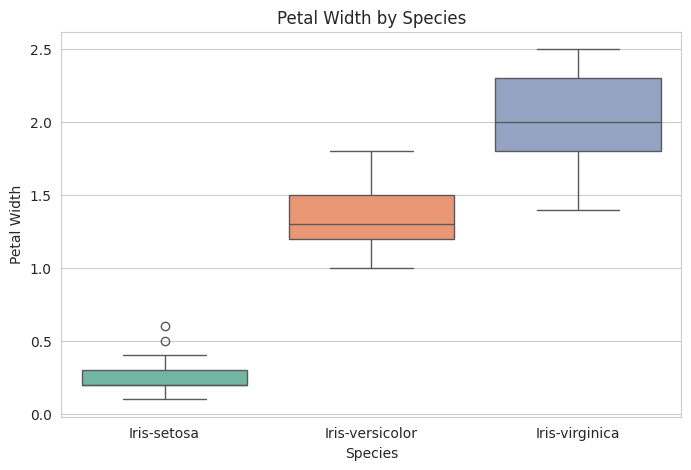

In [91]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["species"], y=df["petal_width"], palette="Set2")
plt.title("Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.show()

Text(0, 0.5, 'Petal Length')

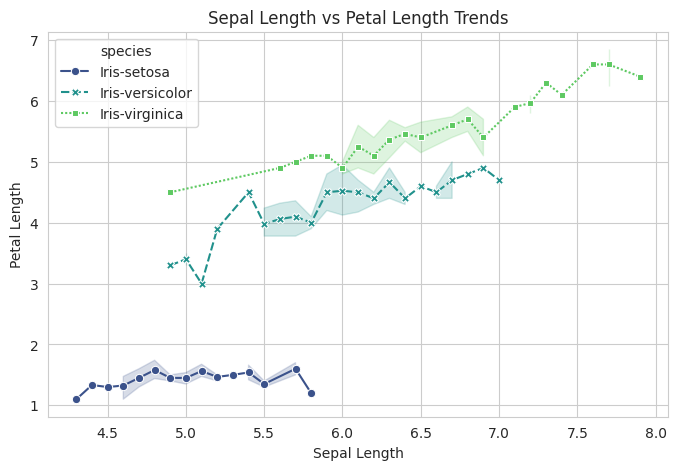

In [92]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df["sepal_length"], y=df["petal_length"], hue=df["species"], style=df["species"], markers=True, palette="viridis")
plt.title("Sepal Length vs Petal Length Trends")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

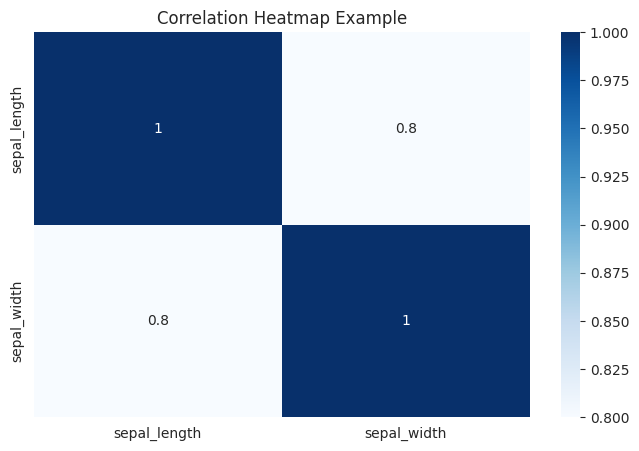

In [93]:
plt.figure(figsize=(8, 5))
sns.heatmap([[1, 0.8], [0.8, 1]], annot=True, cmap="Blues", xticklabels=["sepal_length", "sepal_width"], yticklabels=["sepal_length", "sepal_width"])
plt.title("Correlation Heatmap Example")
plt.show()

### **Data transformation**


In [94]:
L = LabelEncoder()
df["species"] = L.fit_transform(df["species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [95]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.0 KB


### Create model

In [97]:
X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22,
                                                    shuffle=True)

In [98]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MLPClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
model6 = GradientBoostingClassifier()
model7 = XGBClassifier()

In [99]:
accuracies = []

def all(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred,y_test)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)

In [100]:
all(model1)
all(model2)
all(model3)
all(model4)
all(model5)
all(model6)
all(model7)

accuracy = 0.972972972972973
accuracy = 0.9459459459459459
accuracy = 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy = 0.972972972972973
accuracy = 0.972972972972973
accuracy = 0.972972972972973
accuracy = 0.9459459459459459


In [101]:
algorithms = ["LogisticRegression","GaussianNB","MLPClassifier","RandomForestClassifier"," DecisionTreeClassifier","GradientBoostingClassifier","XGBClassifier"]
data = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})
data

,algorithms,accuracies
0,LogisticRegression,0.972973
1,GaussianNB,0.945946
2,MLPClassifier,1.000000
3,RandomForestClassifier,0.972973
4,DecisionTreeClassifier,0.972973
5,GradientBoostingClassifier,0.972973
6,XGBClassifier,0.945946


In [103]:
done = MLPClassifier()
done.fit(X_train,y_train)
prex = done.predict(X_test)
accuracy_score(prex,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

In [104]:
cm = confusion_matrix(y_test, prex)
print(f'Confusion Matrix: {cm}')

Confusion Matrix: [[11  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [106]:
done.score(X_test,y_test)

1.0

In [107]:
done.score(X_train,y_train)

0.9727272727272728

In [108]:
cr = classification_report(y_test, prex)
print(f'Classification Report: {cr}')

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

